In [1]:
import os

os.environ['CUDA_VISIBLE_DEVICES'] = '0'

In [2]:
import tensorflow as tf

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Simple demo neural network classifier:

In [3]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense

num_classes = 2

def build_classifier(num_classes):

    classifier = Sequential([
        Dense(2048, activation='relu', input_shape=(1700, )),
        Dense(128, activation='relu'),
        Dense(16, activation='relu'),
        Dense(num_classes, activation='softmax')
    ])

    classifier.compile(optimizer='adam',
                       loss='categorical_crossentropy',
                       metrics=['accuracy',])
    return classifier

Generate 25 haplotype vectors w/ disease and 25 healthy vectors:

In [4]:
import numpy as np

X_healthy = [np.zeros(1700) for _ in range(25)]
y_healthy = [0. for _ in range(25)]
X_diseased = [np.ones(1700) for _ in range(25)]
y_diseased = [1. for _ in range(25)]

X = np.array(X_healthy + X_diseased)
y = np.array(y_healthy + y_diseased)

One-Hot Encode Output Labels:

In [5]:
from tensorflow.python.keras.utils import to_categorical

y1hot = to_categorical(y, num_classes=num_classes)

## K-Fold Cross Validation
Since we don't have many people represented in our data, we'll do leave-one-out cross validation:

In [6]:
from sklearn.model_selection import KFold

kf = KFold(n_splits=50)
fold_number = 1
for train_index, val_index in kf.split(X):
    print("Fold " + str(fold_number))
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y1hot[train_index], y1hot[val_index]
    classifier = build_classifier(num_classes=num_classes)
    classifier.fit(X_train, y_train, batch_size=49, epochs=8, validation_data=(X_val, y_val), verbose=2)
    classifier.save_weights("fold{}.weights.hdf5".format(fold_number))
    fold_number += 1

Fold 1
Train on 49 samples, validate on 1 samples
Epoch 1/8
 - 1s - loss: 0.6236 - acc: 1.0000 - val_loss: 0.6940 - val_acc: 0.0000e+00
Epoch 2/8
 - 0s - loss: 0.3431 - acc: 0.5102 - val_loss: 0.6915 - val_acc: 1.0000
Epoch 3/8
 - 0s - loss: 0.3387 - acc: 1.0000 - val_loss: 0.6885 - val_acc: 1.0000
Epoch 4/8
 - 0s - loss: 0.3372 - acc: 1.0000 - val_loss: 0.6858 - val_acc: 1.0000
Epoch 5/8
 - 0s - loss: 0.3359 - acc: 1.0000 - val_loss: 0.6817 - val_acc: 1.0000
Epoch 6/8
 - 0s - loss: 0.3339 - acc: 1.0000 - val_loss: 0.6769 - val_acc: 1.0000
Epoch 7/8
 - 0s - loss: 0.3315 - acc: 1.0000 - val_loss: 0.6717 - val_acc: 1.0000
Epoch 8/8
 - 0s - loss: 0.3290 - acc: 1.0000 - val_loss: 0.6661 - val_acc: 1.0000
Fold 2
Train on 49 samples, validate on 1 samples
Epoch 1/8
 - 1s - loss: 1.0902 - acc: 0.4898 - val_loss: 0.6942 - val_acc: 0.0000e+00
Epoch 2/8
 - 0s - loss: 0.5565 - acc: 0.5102 - val_loss: 0.6944 - val_acc: 0.0000e+00
Epoch 3/8
 - 0s - loss: 0.3560 - acc: 0.5102 - val_loss: 0.6937 - va

Epoch 4/8
 - 0s - loss: 0.3390 - acc: 1.0000 - val_loss: 0.6905 - val_acc: 1.0000
Epoch 5/8
 - 0s - loss: 0.3382 - acc: 1.0000 - val_loss: 0.6890 - val_acc: 1.0000
Epoch 6/8
 - 0s - loss: 0.3375 - acc: 1.0000 - val_loss: 0.6879 - val_acc: 1.0000
Epoch 7/8
 - 0s - loss: 0.3369 - acc: 1.0000 - val_loss: 0.6869 - val_acc: 1.0000
Epoch 8/8
 - 0s - loss: 0.3365 - acc: 1.0000 - val_loss: 0.6860 - val_acc: 1.0000
Fold 13
Train on 49 samples, validate on 1 samples
Epoch 1/8
 - 1s - loss: 1.3952 - acc: 0.4898 - val_loss: 0.6990 - val_acc: 0.0000e+00
Epoch 2/8
 - 0s - loss: 0.3424 - acc: 0.5102 - val_loss: 0.6983 - val_acc: 0.0000e+00
Epoch 3/8
 - 0s - loss: 0.3420 - acc: 0.5102 - val_loss: 0.6963 - val_acc: 0.0000e+00
Epoch 4/8
 - 0s - loss: 0.3410 - acc: 0.5102 - val_loss: 0.6933 - val_acc: 0.0000e+00
Epoch 5/8
 - 0s - loss: 0.3396 - acc: 0.5102 - val_loss: 0.6922 - val_acc: 1.0000
Epoch 6/8
 - 0s - loss: 0.3391 - acc: 1.0000 - val_loss: 0.6912 - val_acc: 1.0000
Epoch 7/8
 - 0s - loss: 0.3385 

Epoch 8/8
 - 0s - loss: 0.3349 - acc: 1.0000 - val_loss: 0.6816 - val_acc: 1.0000
Fold 24
Train on 49 samples, validate on 1 samples
Epoch 1/8
 - 1s - loss: 1.1876 - acc: 0.4898 - val_loss: 0.6943 - val_acc: 0.0000e+00
Epoch 2/8
 - 0s - loss: 0.4415 - acc: 0.5102 - val_loss: 0.6936 - val_acc: 0.0000e+00
Epoch 3/8
 - 0s - loss: 0.3397 - acc: 0.5102 - val_loss: 0.6909 - val_acc: 1.0000
Epoch 4/8
 - 0s - loss: 0.3384 - acc: 1.0000 - val_loss: 0.6875 - val_acc: 1.0000
Epoch 5/8
 - 0s - loss: 0.3367 - acc: 1.0000 - val_loss: 0.6841 - val_acc: 1.0000
Epoch 6/8
 - 0s - loss: 0.3351 - acc: 1.0000 - val_loss: 0.6808 - val_acc: 1.0000
Epoch 7/8
 - 0s - loss: 0.3334 - acc: 1.0000 - val_loss: 0.6772 - val_acc: 1.0000
Epoch 8/8
 - 0s - loss: 0.3317 - acc: 1.0000 - val_loss: 0.6734 - val_acc: 1.0000
Fold 25
Train on 49 samples, validate on 1 samples
Epoch 1/8
 - 1s - loss: 0.4120 - acc: 1.0000 - val_loss: 0.6992 - val_acc: 0.0000e+00
Epoch 2/8
 - 0s - loss: 0.3425 - acc: 0.5102 - val_loss: 0.6944 - 

 - 2s - loss: 0.4752 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/8
 - 0s - loss: 0.3566 - acc: 0.4898 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/8
 - 0s - loss: 0.3548 - acc: 0.4898 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/8
 - 0s - loss: 0.3533 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/8
 - 0s - loss: 0.3523 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/8
 - 0s - loss: 0.3516 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/8
 - 0s - loss: 0.3509 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/8
 - 0s - loss: 0.3504 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Fold 36
Train on 49 samples, validate on 1 samples
Epoch 1/8
 - 2s - loss: 0.7283 - acc: 0.5102 - val_loss: 0.0112 - val_acc: 1.0000
Epoch 2/8
 - 0s - loss: 0.3603 - acc: 0.4898 - val_loss: 1.3871e-04 - val_acc: 1.0000
Epoch 3/8
 - 0s - loss: 0.3545 - acc: 0.4898 - val_loss: 1.4901e-06 - val_acc: 1.0000
Epoch 4/8
 - 0s -

Epoch 3/8
 - 0s - loss: 0.3539 - acc: 0.4898 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/8
 - 0s - loss: 0.3525 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/8
 - 0s - loss: 0.3519 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 6/8
 - 0s - loss: 0.3513 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 7/8
 - 0s - loss: 0.3508 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 8/8
 - 0s - loss: 0.3502 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Fold 47
Train on 49 samples, validate on 1 samples
Epoch 1/8
 - 3s - loss: 0.5220 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 2/8
 - 0s - loss: 0.3560 - acc: 0.4898 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 3/8
 - 0s - loss: 0.3533 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 4/8
 - 0s - loss: 0.3501 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epoch 5/8
 - 0s - loss: 0.3472 - acc: 1.0000 - val_loss: 1.1921e-07 - val_acc: 1.0000
Epo

## Predict phenotype on test data using ensemble average of K models
Generate dummy test set:

In [7]:
test_set = [(np.zeros(1700), 0) if np.random.choice(2) == 0 else (np.ones(1700), 1) for _ in range(10)]

In [8]:
X_test, y_test = zip(*test_set) 

In [9]:
y_test1hot = to_categorical(y_test, num_classes=num_classes)

In [10]:
predictions = []
for fold in range(50):
    model = build_classifier(num_classes=num_classes)
    model.load_weights("fold{}.weights.hdf5".format(fold + 1))
    predictions.append(model.predict(np.array(X_test)))

In [17]:
avg_predictions = np.mean(predictions, axis=0)

In [19]:
y_pred = np.argmax(avg_predictions, axis=1)

Confusion matrix, without normalization
[[6 0]
 [0 4]]


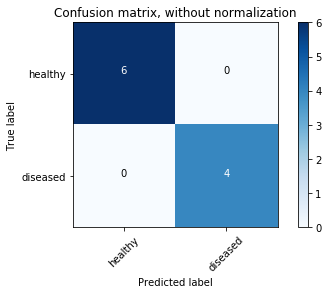

In [20]:
%matplotlib inline


# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=["healthy", "diseased"],
                      title='Confusion matrix, without normalization')